<a href="https://colab.research.google.com/github/Abhishek-7504/Heart-Disease-Classification/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Predicting heart disease using Machine Learning**


This project looks into using Python-based ML and DS libraries in an attempt to build a ML Model capable of predicting whether or not a person has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

##**1. Problem Definition**

In a statement:

"Given medical record of pateients, can we predict whether or not they have heart disease"


##**Data**


[The original dataset can be found here](https://archive.ics.uci.edu/dataset/45/heart+disease)


##**Evaluation**

If we can reach 95% accuracy at predicting if a person has heart disease



##**Features**


**The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.**


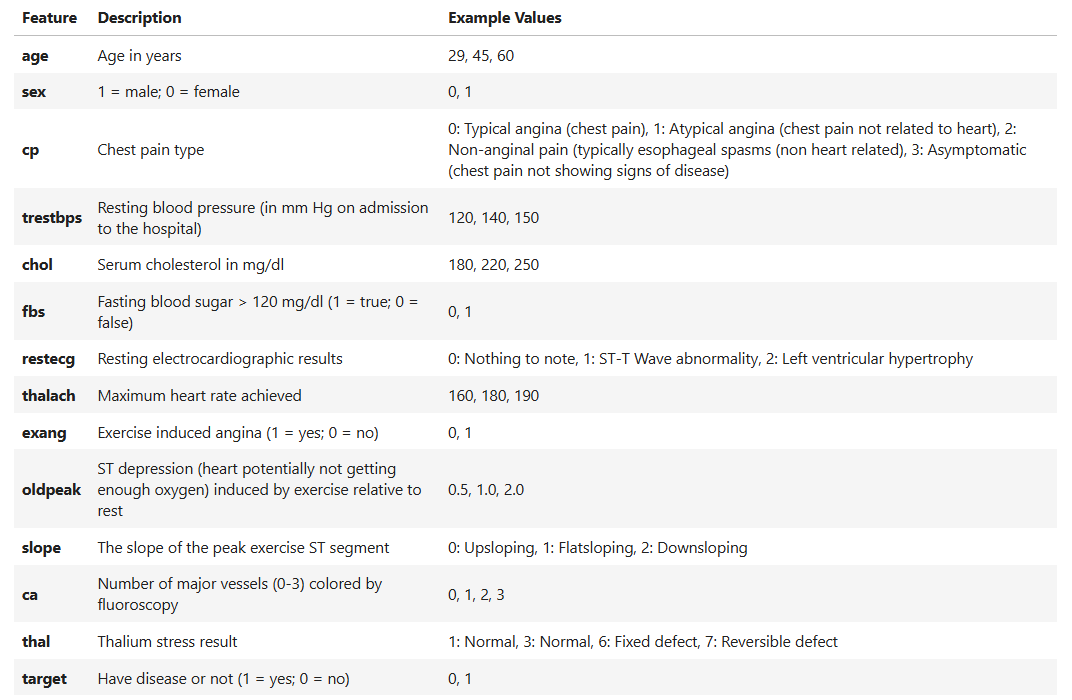




## **2. Preparing the tools**

In [ ]:
# regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots inside our notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score

# Exhaustive search over specified parameter values for an estimator , Randomized search on hyper parameters.
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score

#Receiver Operating Characteristic (ROC) metric to evaluate the quality of multiclass classifiers.
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler

## **3. Loading Data**

In [ ]:
# importing our dataset from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/refs/heads/master/data/heart-disease.csv')
print(df.shape)
print(df.head())
print(df.tail())

(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1    

##**4. EDA ( Exploratory Data Analysis )**

The goal here is to understand our data in depth
- what questions are we trying to solve
- what kind of data is available and how to treat different data types
- Handling of missing values and outliers
- how can i add, change or remove features to get better results

In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


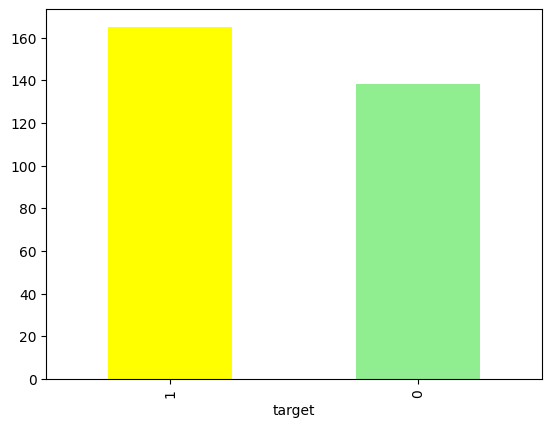

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['yellow','lightgreen']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing one feature with another


In [ ]:
df.sex.value_counts()

,count
sex,
1,207
0,96


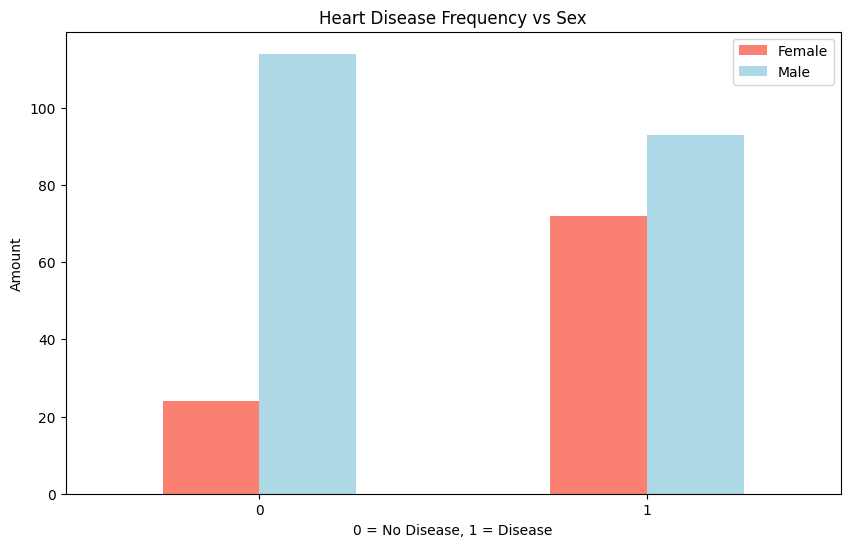

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Age vs Max Heart Rate for heart disease

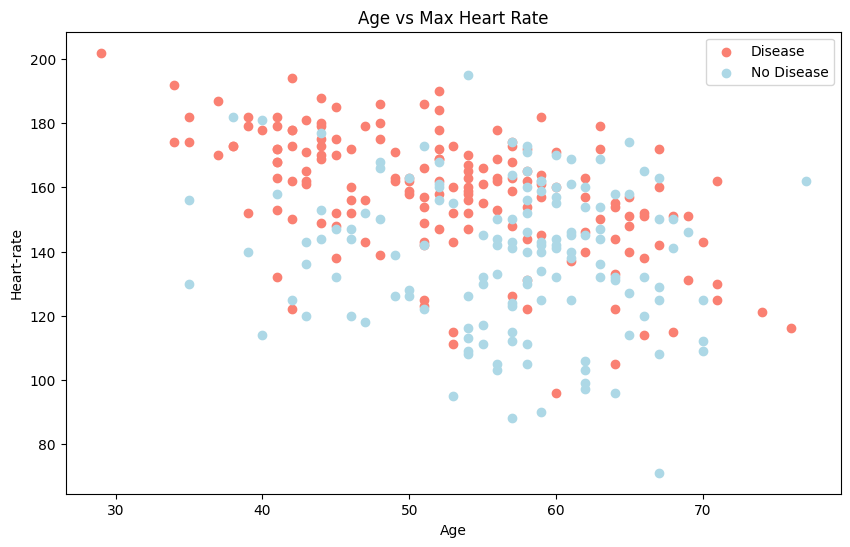

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title("Age vs Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Heart-rate')
plt.legend(['Disease','No Disease']);


Inference from the above plot:

Higher heart disease in younger people, heart disease is common in the middle aged people.

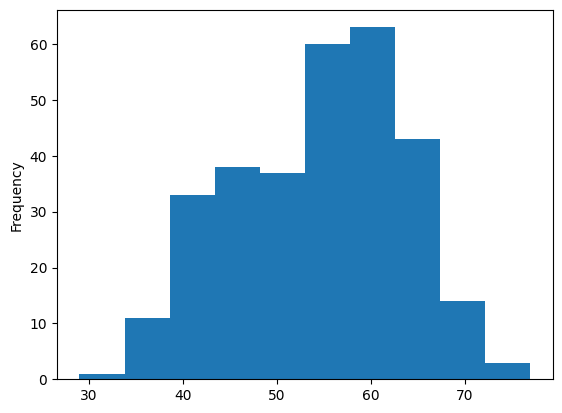

In [ ]:
# Histogram gives a clear picture on the distribution of the variable
df.age.plot.hist();

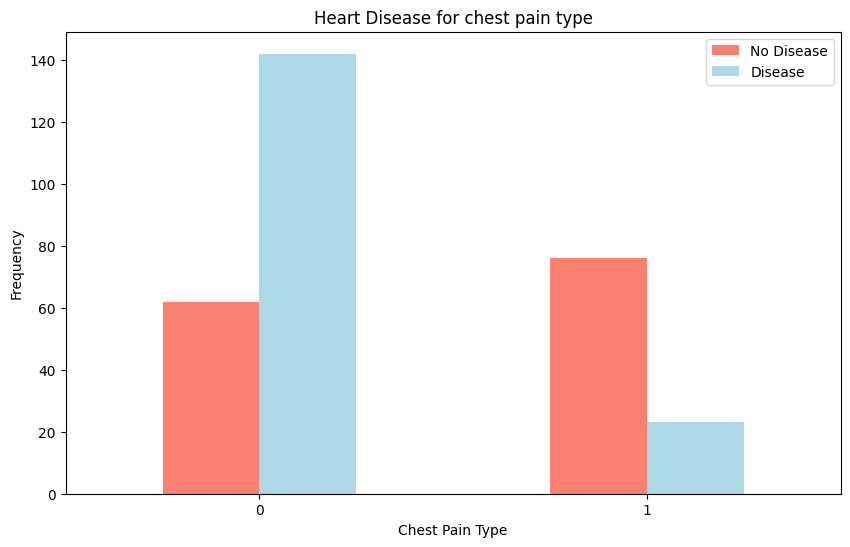

In [ ]:
pd.crosstab(df.exang,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title("Heart Disease for chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [ ]:
# Correlation Maatrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


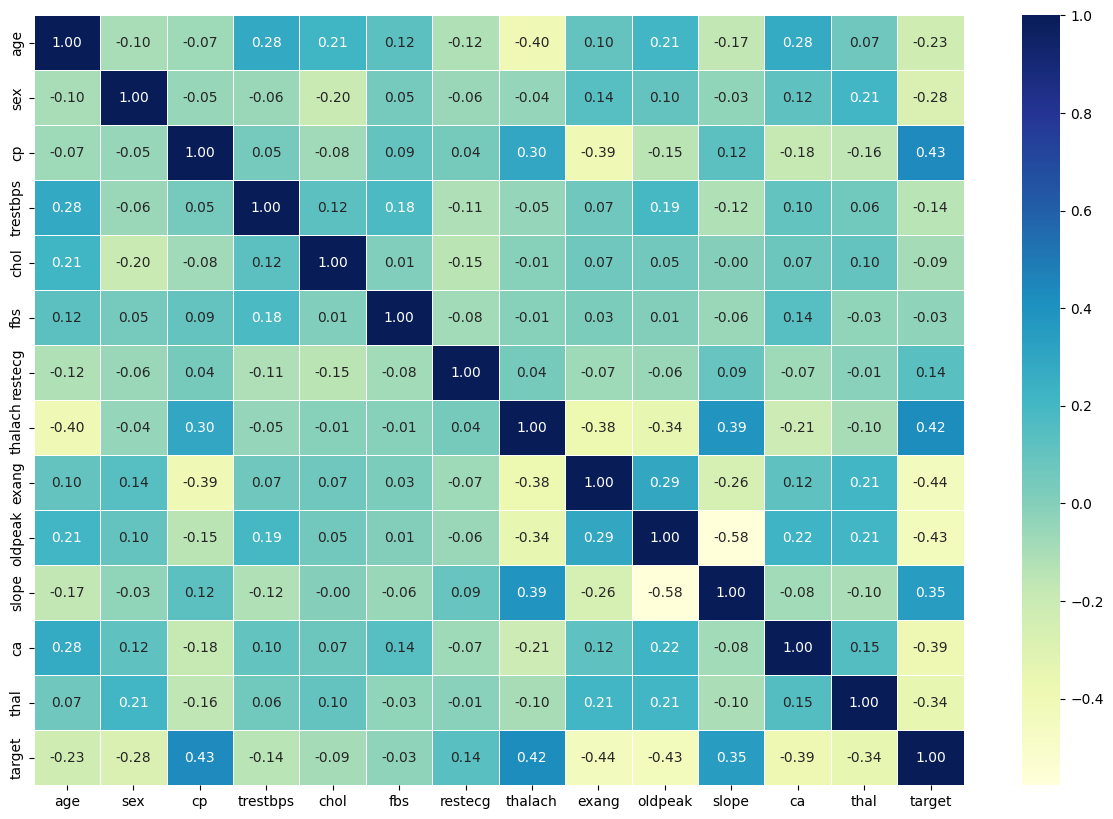

In [ ]:
# A correlation matrix is a table that displays correlation coefficients between pairs of variable
# There are 3 types: positive, negative and no correlation
# Positive correlation: As one variable increases even the other tends to increase
# Negative correlation: As one variable increases other tends to decrease
# No correlation: Values are unrelated to each other

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt='.2f',
                 cmap='YlGnBu')


## **5. Modelling**

In [ ]:
# split data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# splitting the data into training and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Now as we have our training and testing data.
# we will train our model ( to find patterns ) on the training set
# we will test our model ( use the patterns ) on the test set


In [ ]:
models = {"Logistic Regression" : LogisticRegression(max_iter = 1000),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_score = {}
  for name, model in models.items():
    # fit our model
    model.fit(X_train, y_train)
    # evaluate our model and append it's score to model_score
    model_score[name] = model.score(X_test, y_test)
  return model_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model_score = fit_and_score(models=models,
                            X_train=X_train_scaled,
                            X_test=X_test_scaled,
                            y_train=y_train,
                            y_test=y_test)
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8524590163934426}

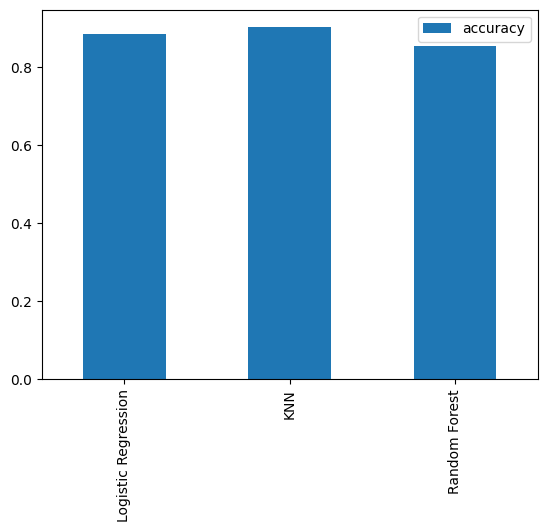

In [ ]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar();

From the graph we understand that KNN has the highest accuracy whereas Logistic Regression has the highest. Now we need to add in these:
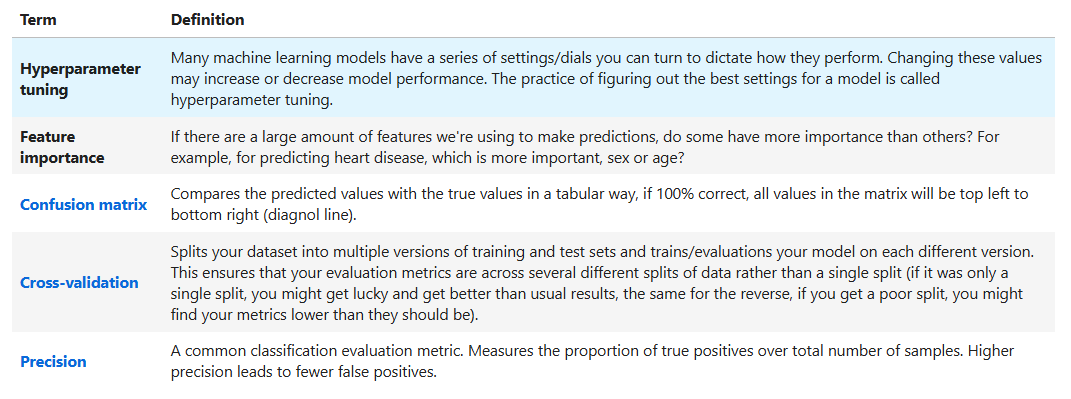


Recall:  A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives

F1 Score: Combines precision and recall into one metric. 1 is best, 0 is worst

Classification Report: Sklearn has a built-in function classification_report() which gives us main classification metrics such as F1 Score, precision and recall

ROC Curve (Reciever Operating charecteristic): Plot of true positive rate versus false positive rate. A perfect curve will follow the left and top border of a plot.

Area Under Curve(AUC): The area underneath the ROC curve. A perfect model achieves a score of 1.0

## **6. Hyperparameter Tuning**

In [ ]:
# let's tune KNN
train_scores = []
test_scores = []

# Create a list of distinct values for neighbors
neighbors = range(1,21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through the neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  # fit the algo
  knn.fit(X_train, y_train)

  # update scores list
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

print(f"train_scores:{train_scores}")
print(f"test scores: {test_scores}")

train_scores:[1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
test scores: [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


Maximum KNN Score on the test data: 75.41%


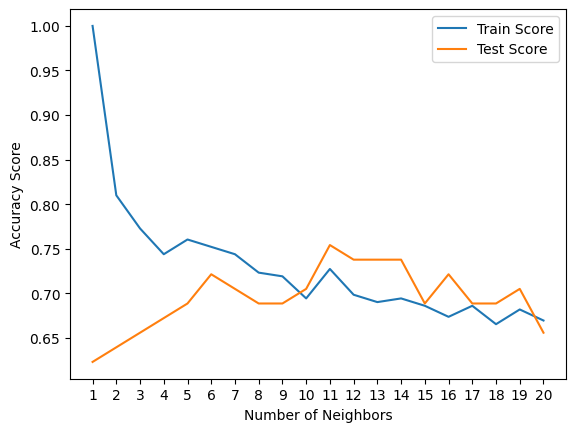

In [ ]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

**Hyperparameter tuning with RandomizedSearchCV**

RandomizedSearchCV implements the fit and score methods. It samples hyperparameters randomly from given distributions, trains the model with each combination using cross-validation, and selects the best performing model. The number of iterations (n_iter) determines how many different hyperparameter combinations are tested.

We are going to tune:
- LogisticRegression()
- RandomForestClassifier()

... using RandomizedSearchCV

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [ ]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 568 ms, sys: 993 µs, total: 569 ms
Wall time: 580 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned out logistic regression model, let's do the same for random forest classifier

In [ ]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.8688524590163934

**Hyperparameter Tuning with GridSearchCV**

In [ ]:
# different hyperparameters for our logistic regression
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":['liblinear']}

# set up grid search cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569415), 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test )

0.8852459016393442

# **7. Evaluate our ML Classifier beyond accuracy**

- ROC and AUC:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- F1-score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

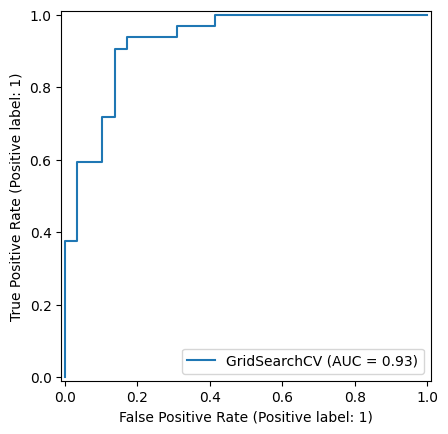

In [ ]:
# What's a ROC curve?
# It's a way of understanding how your model is performing,
# by comparing the true positive rate to the false positive rate.

# A perfect model achieves an AUC Score of 1.0

RocCurveDisplay.from_estimator(estimator = gs_log_reg,
                               X = X_test,
                               y = y_test);

**Confusion Matrix**

- True Positive = model predicts 1 when truth is 1
- False Positive = model predicts 1 when truth is 0
- True Negative = model predicts 0 when truth is 1
- False Negative = model predicts 0 when truth is 1

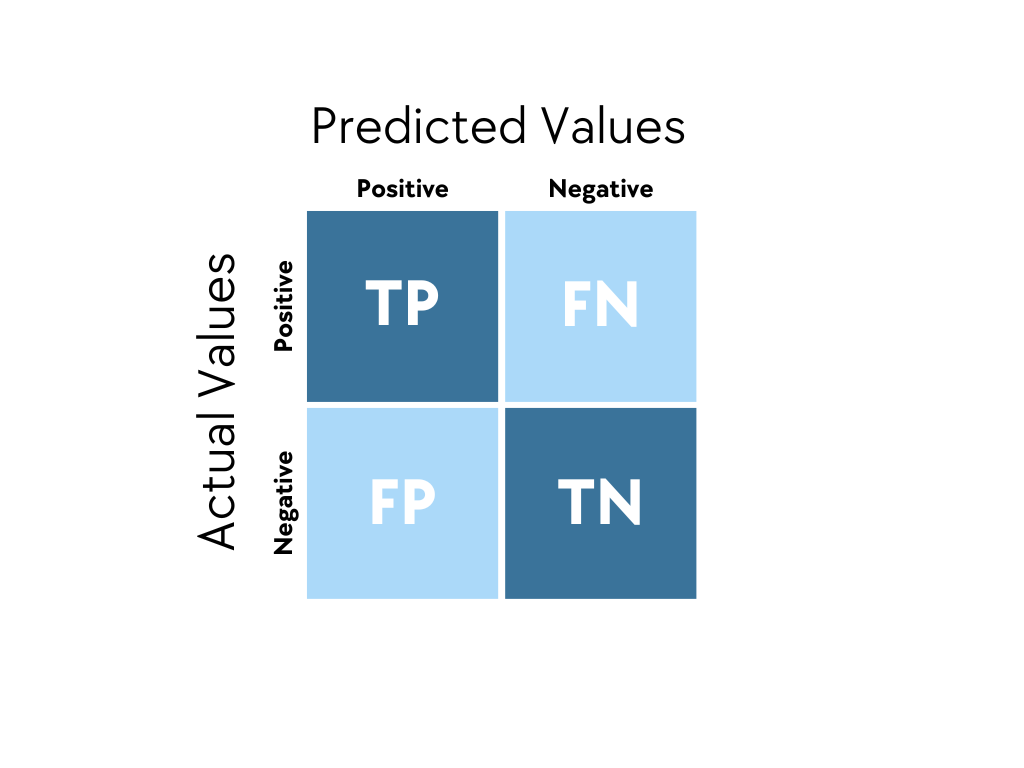

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


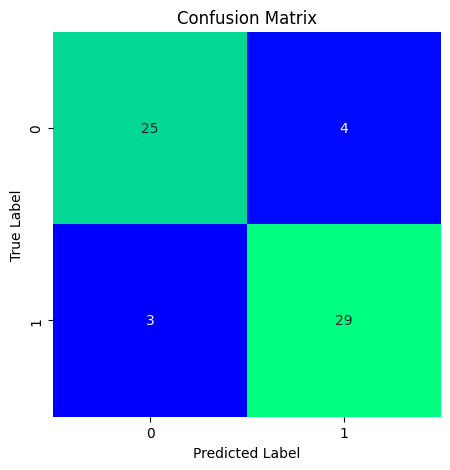

In [ ]:
def plot_conf_mat(y_test, y_preds):
  '''
  Plots a confusion matrix using Seaborn's heatmap()
  '''
  fig, ax = plt.subplots(figsize=(5,5))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False,
                   cmap='winter')
  # refer this for cmap color combinations:
  # https://matplotlib.org/stable/users/explain/colors/colormaps.html


  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
print("Precison: Proportion of \"True Positives\" to the toal number of samples")
print("F1-Score: Combines precision and recall into one metric")
print("Recall: Proportion of \"True Positives over total number of TP and FN\"")
print()

print(f"F1-Score: {f1_score(y_test, y_preds)}")
print(f"Recall-Score: {recall_score(y_test, y_preds)}")
precision = precision_score(y_test, y_preds)
print(f"precision: {precision:.2f}")

Precison: Proportion of "True Positives" to the toal number of samples
F1-Score: Combines precision and recall into one metric
Recall: Proportion of "True Positives over total number of TP and FN"

F1-Score: 0.8923076923076924
Recall-Score: 0.90625
precision: 0.88


## **Evaluation Metrics using cross-validation**

In [ ]:
gs_log_reg.best_params_


{'C': np.float64(0.20433597178569415), 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

In [ ]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring = 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8207936507936507)

In [ ]:
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    scoring = "recall"))
cv_recall

np.float64(0.9212121212121213)

In [ ]:
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv = 5,
                                scoring = "f1"))
cv_f1

np.float64(0.8673007976269721)

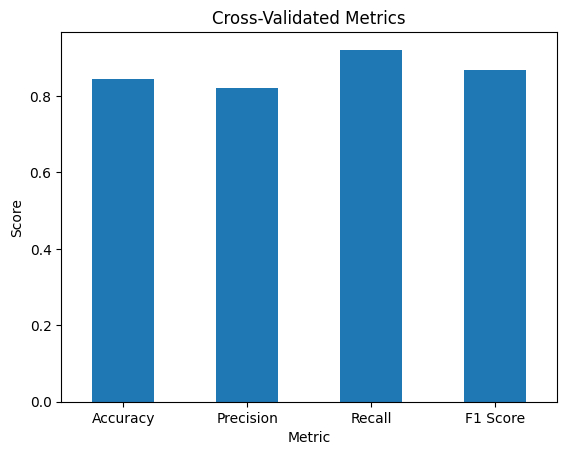

In [ ]:
cv_metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [cv_acc, cv_precision, cv_recall, cv_f1]
})

# Plot with different colors
cv_metrics.set_index("Metric").plot(kind='bar', title="Cross-Validated Metrics", legend=False)

# Show the plot
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


# **8.Feature Importance**

Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

Since we're using LogisticRegression, we'll use the "coef_".

"coef_" attribute is the coefficient of features in a decision function

In [ ]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00316728, -0.86044673,  0.66067032, -0.01156993, -0.00166374,
         0.04386101,  0.31275864,  0.02459361, -0.60413094, -0.5686279 ,
         0.45051632, -0.63609907, -0.67663374]])

In [ ]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.003167282794709144),
 'sex': np.float64(-0.8604467348902056),
 'cp': np.float64(0.6606703189525263),
 'trestbps': np.float64(-0.011569932520321466),
 'chol': np.float64(-0.0016637445076489463),
 'fbs': np.float64(0.04386101102709623),
 'restecg': np.float64(0.3127586430963049),
 'thalach': np.float64(0.024593614764159985),
 'exang': np.float64(-0.604130938845009),
 'oldpeak': np.float64(-0.5686278997154095),
 'slope': np.float64(0.45051632312010975),
 'ca': np.float64(-0.6360990697134957),
 'thal': np.float64(-0.6766337424868787)}

Text(0, 0.5, 'Values')

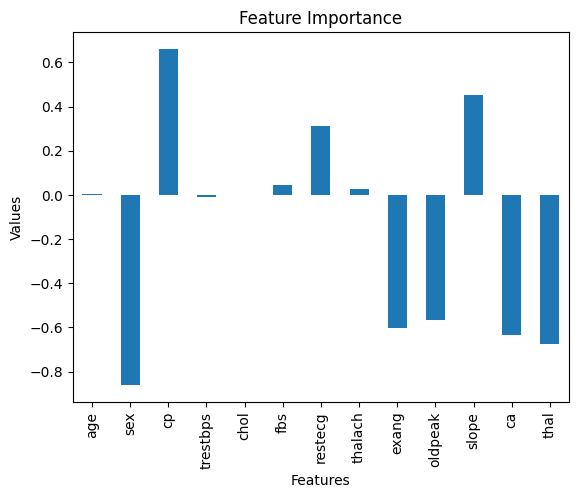

In [ ]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title = "Feature Importance", legend = False)
plt.xlabel("Features")
plt.ylabel("Values")